# Synthetic, Time-Varying NMR Patterns
The primary type of data we have in our project is time-varying NMR patterns. 
We demonstrate the patterns generated over time by our tools here.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from nmrtrack import synthetic
import numpy as np

## Make the Generator
The generator for NMR time-varying signals is another layer atop the static pattern generator from the [previous notebook](./0_illustrate-synthetic-patterns.ipynb)

In [2]:
generator = synthetic.TimeSeriesGenerator(offset_count=128, time_count=128)
generator

TimeSeriesGenerator(seed=None, num_to_generate=None, multiplicity_depth_weights=(0.2, 0.7, 0.1), multiplicity_weights=(0.5, 0.45, 0.05), multiplicity_coupling_offset_range=(0.002, 0.02), peak_width_range=(0.0004, 0.001), peak_area_range=(0.02, 1.0), pattern_peak_count_weights=(0.5, 0.4, 0.1), offset_length=0.2, offset_count=128, movement_probability=0.7, movement_knot_count_weight=(0.4, 0.4, 0.2), movement_maximum_offset=0.1, growth_probability=0.7, growth_rate_distribution=(-4.0, 4.0), time_count=128)

You can see that there are many adjustable parameters, but we'll just use the defaults

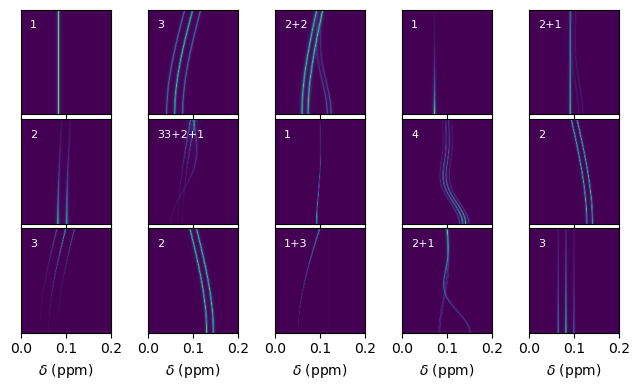

In [3]:
fig, axs = plt.subplots(3, 5, figsize=(6.5, 4.), sharex=True, sharey=True)

offsets = generator.offsets
times = generator.times
for ax, (info, pattern) in zip(axs.flatten(), generator.generate_patterns()):
    name = '+'.join([x.peak.peak_type for x in info])
    ax.text(0.1, 0.9, name, transform=ax.transAxes, fontsize=8, va='top', color='w')
    ax.imshow(pattern, origin='lower', aspect='auto', extent=[0, offsets.max(), 0, times.max()])
    ax.set_yticks([])

for ax in axs[-1, :]:
    ax.set_xlabel('$\delta$ (ppm)')

fig.tight_layout(h_pad=0)
fig.savefig('figures/random-nmr-series.png', dpi=320)